In [1]:
HEIGHT = 128
WIDTH = 128
EPOCHS = 15
BATCH_SIZE = 16
TRAIN_CSV = "./datasets/nyu2/nyu2_train.csv"

In [2]:
import numpy as np
import tensorflow as tf
from segmentation_models import Unet

%run utils/datasets.ipynb

%run utils/utils.ipynb

Segmentation Models: using `keras` framework.


In [3]:
partition, labels = load_train_csv(TRAIN_CSV)

In [4]:
print(len(partition['train']), len(partition['validation']))

424 107


In [5]:
training_generator = DataGenerator(list_IDs=partition['train'], labels=labels, batch_size=BATCH_SIZE,
                                   dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True, pred=False)
validation_generator = DataGenerator(list_IDs=partition['validation'], labels=labels, batch_size=BATCH_SIZE,
                                     dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True, pred=False)

In [6]:
model = Unet("resnet34", input_shape=(HEIGHT,WIDTH,3), encoder_weights="imagenet", encoder_freeze=False)

In [7]:
# model.summary()

In [8]:
model.compile(optimizer=opt, loss=depth_loss, metrics=[depth_acc])

In [9]:
r = model.fit(training_generator, validation_data=validation_generator, epochs=EPOCHS)

Epoch 1/15
26/26 [==============================] - 17s 163ms/step - loss: 0.6388 - depth_acc: 0.9149 - val_loss: 0.5726 - val_depth_acc: 0.9608
Epoch 2/15
26/26 [==============================] - 4s 134ms/step - loss: 0.5545 - depth_acc: 0.9781 - val_loss: 0.5454 - val_depth_acc: 0.9613
Epoch 3/15
26/26 [==============================] - 4s 134ms/step - loss: 0.5496 - depth_acc: 0.9823 - val_loss: 0.5405 - val_depth_acc: 0.9694
Epoch 4/15
26/26 [==============================] - 4s 134ms/step - loss: 0.5470 - depth_acc: 0.9807 - val_loss: 0.5398 - val_depth_acc: 0.9810
Epoch 5/15
26/26 [==============================] - 4s 135ms/step - loss: 0.5443 - depth_acc: 0.9801 - val_loss: 0.5355 - val_depth_acc: 0.9812
Epoch 6/15
26/26 [==============================] - 4s 136ms/step - loss: 0.5423 - depth_acc: 0.9798 - val_loss: 0.5333 - val_depth_acc: 0.9811
Epoch 7/15
26/26 [==============================] - 4s 136ms/step - loss: 0.5394 - depth_acc: 0.9809 - val_loss: 0.5317 - val_depth_acc

In [10]:
print(r.history)

{'loss': [0.6388494968414307, 0.5544902086257935, 0.5495733022689819, 0.5469875931739807, 0.5442505478858948, 0.5423036813735962, 0.5393750667572021, 0.5359464883804321, 0.5354255437850952, 0.532905638217926, 0.5304473638534546, 0.5295581221580505, 0.5261519551277161, 0.5267201662063599, 0.5258311629295349], 'depth_acc': [0.9148696064949036, 0.978104829788208, 0.9823378324508667, 0.9806693196296692, 0.9801428914070129, 0.9797571897506714, 0.9808992147445679, 0.9858879446983337, 0.9773725271224976, 0.9803149700164795, 0.981656014919281, 0.9820791482925415, 0.983709454536438, 0.9810956716537476, 0.9775920510292053], 'val_loss': [0.5726353526115417, 0.5454352498054504, 0.5405192971229553, 0.5397826433181763, 0.5354622602462769, 0.5333389639854431, 0.5316653251647949, 0.5326326489448547, 0.5304391384124756, 0.5270413756370544, 0.5278018712997437, 0.5228195786476135, 0.5277125239372253, 0.5224707126617432, 0.5211142897605896], 'val_depth_acc': [0.9607563018798828, 0.9613075256347656, 0.9694

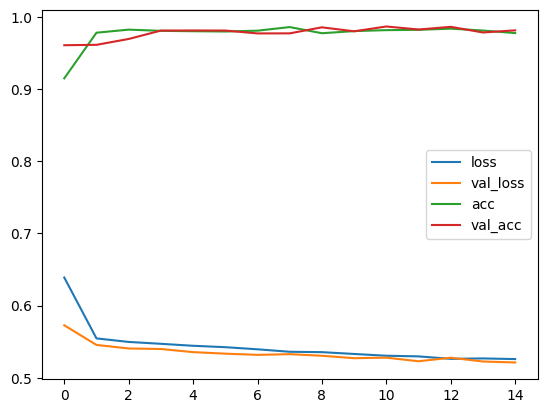

In [11]:
plot_history(r.history)

In [12]:
print(save_model('unet', model))

model_unet_1708285396.keras
